In [1]:
import pandas as pd
import numpy as np
import env
import wrangle
import matplotlib.pyplot as plt

In [12]:
customers = pd.read_sql("SELECT customer_id, monthly_charges, tenure, total_charges FROM customers WHERE contract_type_id = 3", env.get_db_url('telco_churn'))


In [13]:
customers.head()

,customer_id,monthly_charges,tenure,total_charges
0,0013-SMEOE,109.70,71,7904.25
1,0014-BMAQU,84.65,63,5377.8
2,0016-QLJIS,90.45,65,5957.9
3,0017-DINOC,45.20,54,2460.55
4,0017-IUDMW,116.80,72,8456.75


In [14]:
customers.tail()

,customer_id,monthly_charges,tenure,total_charges
1690,9964-WBQDJ,24.40,71,1725.4
1691,9972-EWRJS,19.25,67,1372.9
1692,9975-GPKZU,19.75,46,856.5
1693,9993-LHIEB,67.85,67,4627.65
1694,9995-HOTOH,59.00,63,3707.6


In [15]:
customers.describe()

,monthly_charges,tenure
count,1695.000000,1695.000000
mean,60.770413,56.735103
std,34.678865,18.209363
min,18.400000,0.000000
25%,24.025000,48.000000
50%,64.350000,64.000000
75%,90.450000,71.000000
max,118.750000,72.000000


In [16]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1695 entries, 0 to 1694
Data columns (total 4 columns):
customer_id        1695 non-null object
monthly_charges    1695 non-null float64
tenure             1695 non-null int64
total_charges      1695 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 53.1+ KB


In [17]:
customers.shape

(1695, 4)

In [18]:
customers.sort_values(by="total_charges")

,customer_id,monthly_charges,tenure,total_charges
524,3213-VVOLG,25.35,0,
416,2520-SGTTA,20.00,0,
678,4075-WKNIU,73.35,0,
234,1371-DWPAZ,56.05,0,
941,5709-LVOEQ,80.85,0,
...,...,...,...,...
731,4526-EXKKN,24.60,40,973.95
442,2675-IJRGJ,19.65,53,978
582,3521-HTQTV,26.10,34,980.35
714,4361-FEBGN,20.15,48,982.95


In [19]:
print(customers.isnull().sum())

customer_id        0
monthly_charges    0
tenure             0
total_charges      0
dtype: int64


In [20]:
customers.replace(r'^\s*$', np.nan, regex=True, inplace=True)

In [21]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1695 entries, 0 to 1694
Data columns (total 4 columns):
customer_id        1695 non-null object
monthly_charges    1695 non-null float64
tenure             1695 non-null int64
total_charges      1685 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 53.1+ KB


In [22]:
customers = customers.dropna()

In [23]:
customers['total_charges'] = customers.total_charges.astype('float') 

In [24]:
customers.describe()

,monthly_charges,tenure,total_charges
count,1685.000000,1685.00000,1685.000000
mean,60.872374,57.07181,3728.933947
std,34.712210,17.72913,2571.252806
min,18.400000,1.00000,20.350000
25%,24.050000,48.00000,1278.800000
50%,64.450000,64.00000,3623.950000
75%,90.550000,71.00000,5999.850000
max,118.750000,72.00000,8672.450000


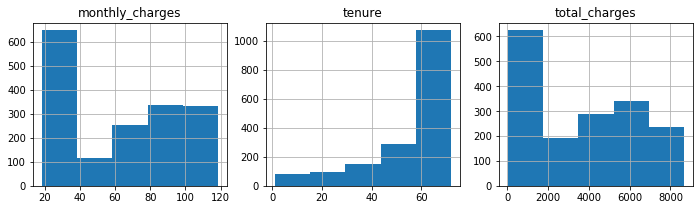

In [25]:
plt.figure(figsize=(16, 3))

for i, col in enumerate(['monthly_charges', 'tenure', 'total_charges']):  
    plot_number = i + 1 # i starts at 0, but plot nos should start at 1
    series = customers[col]  
    plt.subplot(1,4, plot_number)
    plt.title(col)
    series.hist(bins=5)

In [26]:
wrangle

<module 'wrangle' from '/Users/ravindersingh/codeup-data-science/ds-methodologies-exercise/regression/wrangle.py'>

In [27]:
wrangle.wrangle_telco()

,customer_id,monthly_charges,tenure,total_charges
0,0013-SMEOE,109.70,71,7904.25
1,0014-BMAQU,84.65,63,5377.80
2,0016-QLJIS,90.45,65,5957.90
3,0017-DINOC,45.20,54,2460.55
4,0017-IUDMW,116.80,72,8456.75
...,...,...,...,...
1690,9964-WBQDJ,24.40,71,1725.40
1691,9972-EWRJS,19.25,67,1372.90
1692,9975-GPKZU,19.75,46,856.50
1693,9993-LHIEB,67.85,67,4627.65
